In [1]:
import json
with open('C:/Users/Vlad/Downloads/archive (2)/TrainData/train/Annotations/iSAID_train.json', 'r', encoding='Utf-8') as json_data:
    tmd=json.load(json_data)

In [10]:
import numpy as np
from PIL import Image
from tqdm import tqdm

def img_data_create(data, cat, im_path):
    '''Функция, создающая словарь типа {image_id:{'image_size':...,'polygons':[[...],...,[...]],
    'bboxes':[[...],...,[...]]},...} для категории cat, где image_id - id изображения, image_size - размер изображения,
    polygons - массив координат для построения масок объектов на изображении, bboxes - массив ограничивающих рамок объектов на 
    изображении
    Входные параметры: data - словарь с аннотациями для объектов
                       cat - категория
                       im_path - путь к изображениям
    Выходные данные: словарь'''
    cat_id = [x for x in data['categories'] if x['name'] == cat][0]['id']
    anns = [ann for ann in data['annotations'] if ann['category_id'] == cat_id]
    img_data = {}
    for ann in anns:
        img_data[ann['image_id']] = {}
        img_data[ann['image_id']]['polygons'] = [] 
        img_data[ann['image_id']]['bboxes'] = [] 
    for ann in anns:
        img_data[ann['image_id']]['polygons'].append(ann['segmentation'][0])
        img_data[ann['image_id']]['bboxes'].append([ann['bbox'][0],ann['bbox'][1],ann['bbox'][0]+ann['bbox'][2]-1,ann['bbox'][1]+ann['bbox'][3]-1])
    for im_id in tqdm(img_data):
        im_fn = [x for x in data['images'] if x['id'] == im_id][0]['file_name']
        im = Image.open(f'{im_path}/{im_fn}')
        img_data[im_id]['img_size']=im.size
    return img_data

In [7]:
data_cat_imgs=img_data_create(tmd, 'storage_tank', 'C:/Users/Vlad/Downloads/dota/train')

100%|██████████████████████████████████████████████████████████████████████████████| 245/245 [00:00<00:00, 1181.01it/s]


In [8]:
num_of_obj=[] # количество объектов на изображении
xpos_obj=[] # x координата центра объекта
ypos_obj=[] # y координата центра объекта
xsize_img=[] # размер изображения по оси x
ysize_img=[] # размер изображения по оси y
for img_data in data_cat_imgs.values():
    xsize_img.append(img_data['img_size'][0])
    ysize_img.append(img_data['img_size'][1])
    num_of_obj.append(len(img_data['bboxes']))
    for box in img_data['bboxes']:
        xpos_obj.append((box[2]+box[0])/(2*img_data['img_size'][0]))
        ypos_obj.append((box[3]+box[1])/(2*img_data['img_size'][1]))

<Figure size 5000x4000 with 0 Axes>

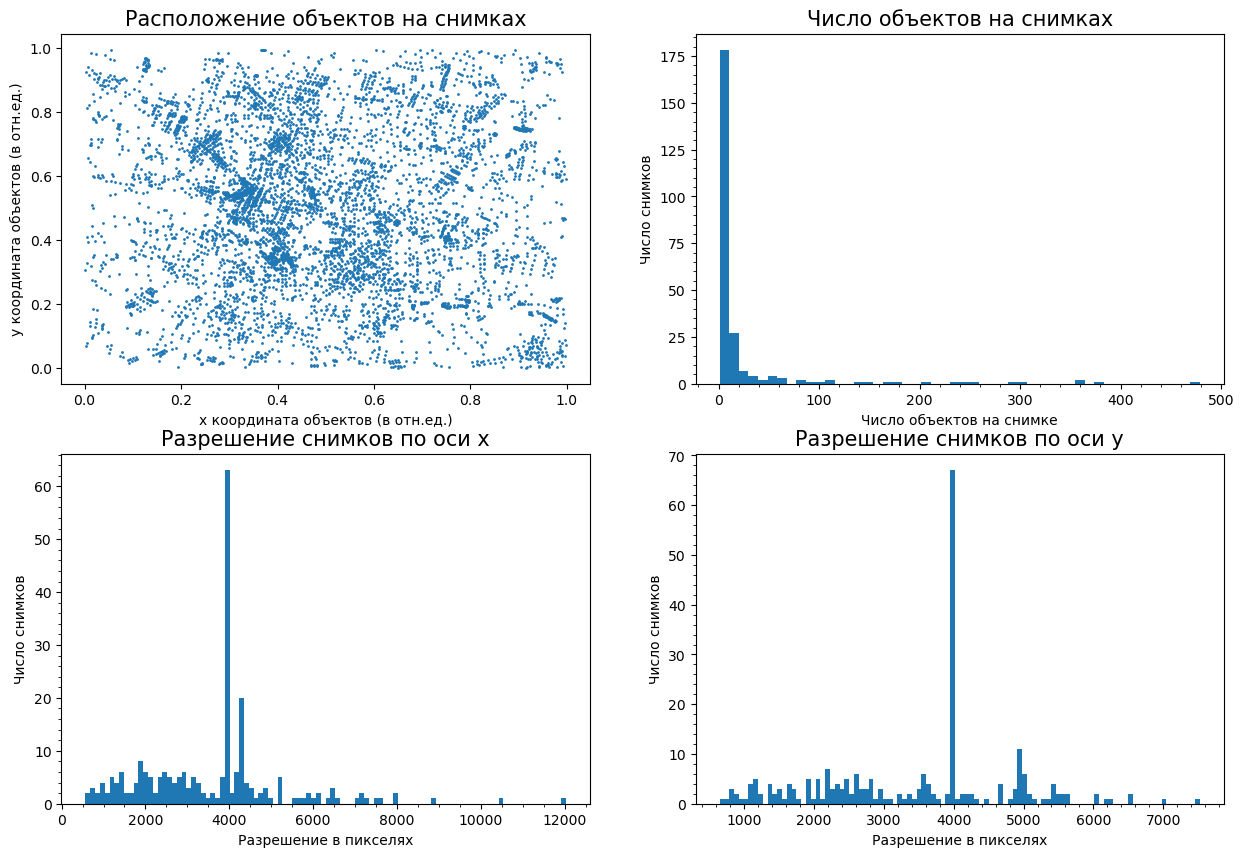

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=[50, 40])
fig, ax=plt.subplots(2,2,figsize=(15,10))
ax[0][0].scatter(xpos_obj,ypos_obj,s=1)
ax[0][0].set_xlabel('x координата объектов (в отн.ед.)')
ax[0][0].set_ylabel('y координата объектов (в отн.ед.)')
ax[0][0].set_title('Расположение объектов на снимках',fontsize=15)
ax[0][1].hist(num_of_obj,bins=50)
ax[0][1].minorticks_on()
ax[0][1].set_title('Число объектов на снимках',fontsize=15)
ax[0][1].set_xlabel('Число объектов на снимке')
ax[0][1].set_ylabel('Число снимков')
ax[1][0].hist(xsize_img,bins=100)
ax[1][0].minorticks_on()
ax[1][0].set_title('Разрешение снимков по оси x',fontsize=15)
ax[1][0].set_xlabel('Разрешение в пикселях')
ax[1][0].set_ylabel('Число снимков')
ax[1][1].hist(ysize_img,bins=100)
ax[1][1].minorticks_on()
ax[1][1].set_title('Разрешение снимков по оси y',fontsize=15)
ax[1][1].set_xlabel('Разрешение в пикселях')
ax[1][1].set_ylabel('Число снимков')
plt.show()